<a href="https://www.kaggle.com/code/sharonlogier/king-county-house-sales?scriptVersionId=224060560" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

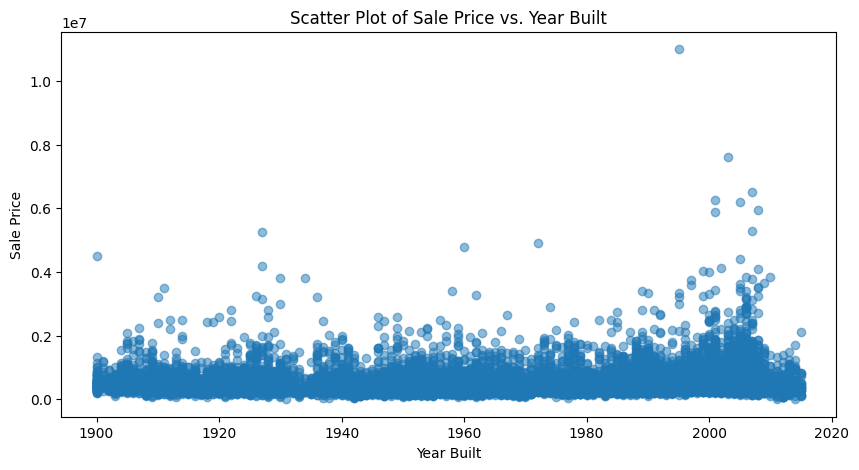

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/kaggle/input/king-county-house-sales-usa/house_sales.csv")

# Create scatter plot
plt.figure(figsize=(10,5))
plt.scatter(df["YrBuilt"], df["SalePrice"], alpha=0.5)

# Labels and title
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Sale Price vs. Year Built")

# Display the plot
plt.show()


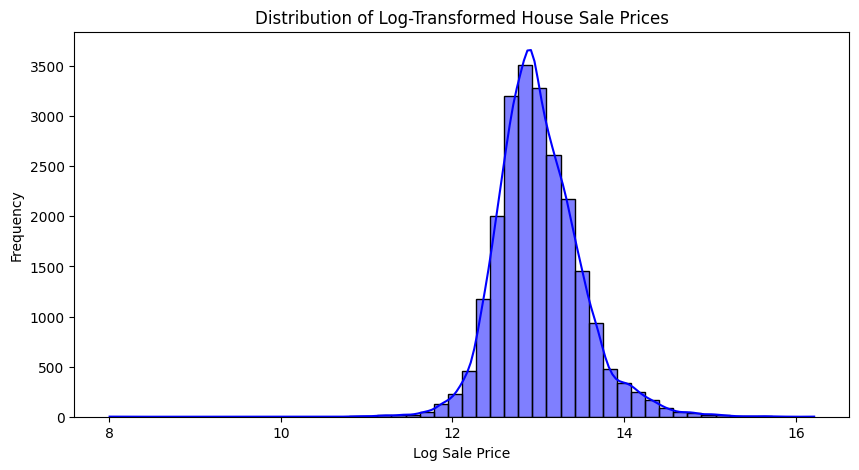

In [18]:
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Ensure SalePrice does not contain infinite values
df["SalePrice"] = pd.to_numeric(df["SalePrice"], errors="coerce")
df["SalePrice"] = df["SalePrice"].replace([np.inf, -np.inf], np.nan)

# Drop NaN values
df = df.dropna(subset=["SalePrice"]).copy()  # Copy ensures avoiding SettingWithCopyWarning

# Apply log transformation for better visualization
df["LogSalePrice"] = np.log1p(df["SalePrice"])

# Plot the histogram with log-transformed sale prices
plt.figure(figsize=(10, 5))
sns.histplot(df["LogSalePrice"], bins=50, kde=True, color="blue")
plt.xlabel("Log Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed House Sale Prices")
plt.show()



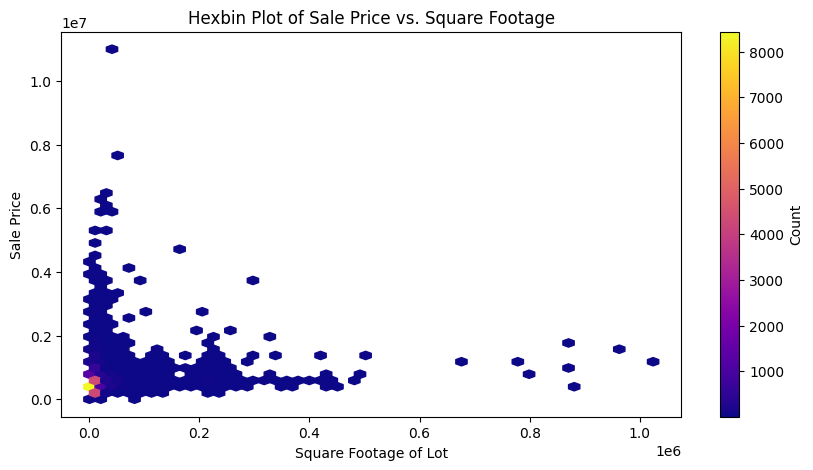

In [22]:
# Create hexbin plot with a lighter color scheme for better visibility
plt.figure(figsize=(10, 5))
plt.hexbin(df["SqFtLot"], df["SalePrice"], gridsize=50, cmap="plasma", mincnt=1)  # Using "plasma" for a lighter contrast

# Format axes
plt.colorbar(label="Count")
plt.xlabel("Square Footage of Lot")
plt.ylabel("Sale Price")
plt.title("Hexbin Plot of Sale Price vs. Square Footage")

plt.show()


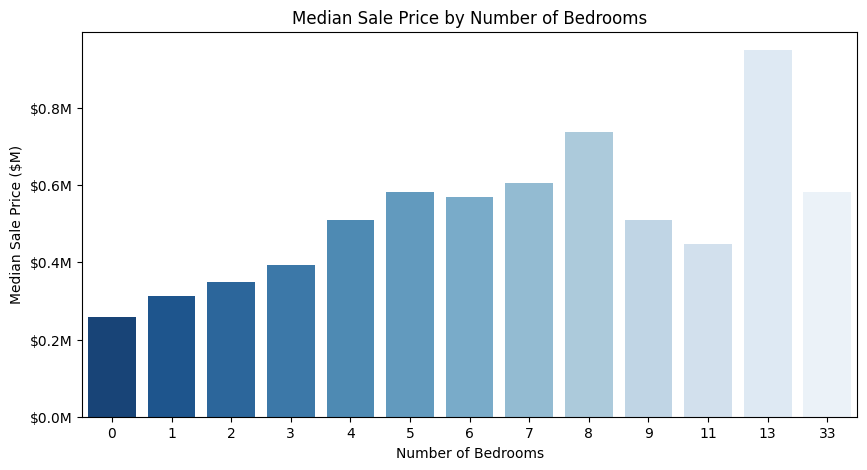

In [20]:
import matplotlib.ticker as mtick

# Compute median sale price instead of mean to reduce skewness from outliers
median_price_by_bedrooms = df.groupby("Bedrooms")["SalePrice"].median().sort_values(ascending=False)

# Plot bar chart with formatted Y-axis in millions ($M)
plt.figure(figsize=(10, 5))
sns.barplot(x=median_price_by_bedrooms.index, y=median_price_by_bedrooms.values, palette="Blues_r")

# Formatting axes
plt.xlabel("Number of Bedrooms")
plt.ylabel("Median Sale Price ($M)")
plt.title("Median Sale Price by Number of Bedrooms")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))  # Convert to millions

plt.show()

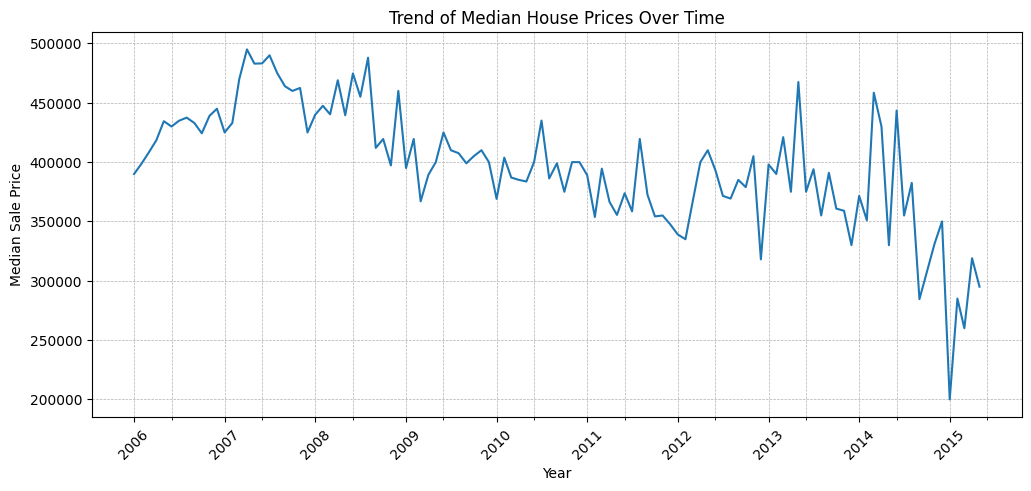

In [23]:
import matplotlib.dates as mdates

# Convert 'DocumentDate' to datetime format
df["DocumentDate"] = pd.to_datetime(df["DocumentDate"])

# Extract year-month for aggregation
df["YearMonth"] = df["DocumentDate"].dt.to_period("M").astype(str)
df["YearMonth"] = pd.to_datetime(df["YearMonth"], format="%Y-%m")

# Compute the median sale price over time
median_price_over_time = df.groupby("YearMonth")["SalePrice"].median()

# Plot the trend of median house prices over time
plt.figure(figsize=(12, 5))
sns.lineplot(x=median_price_over_time.index, y=median_price_over_time.values)

# Format x-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Show every year
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[6]))  # Show minor ticks for mid-year points
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Labels and title
plt.xlabel("Year")
plt.ylabel("Median Sale Price")
plt.title("Trend of Median House Prices Over Time")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
